# Prediction using Supervised ML
(Level - Beginner)

Predict the percentage of an student based on the no. of study hours.

In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Reading the data frame into the memory
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#Checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [17]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

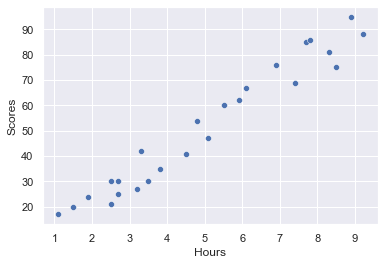

In [20]:
#Observing the distribution of data
sns.scatterplot('Hours','Scores',data=df,palette='set2')

In [6]:
#Reshaping sample and feature arrays
X=df['Hours'][:,np.newaxis]
y=df['Scores']
y

<ipython-input-6-dac213b2239a>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X=df['Hours'][:,np.newaxis]


0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [7]:
#Model Selection
from sklearn.model_selection import train_test_split

In [8]:
#Splitting the data into training and testing sets
Xtrain,Xtest,ytrain,ytest= train_test_split(X,y,test_size=0.3)
ytest

14    17
20    30
5     20
13    42
7     60
16    30
21    54
8     81
Name: Scores, dtype: int64

In [9]:
#Regression models a target prediction value based on independent variables
#It is mostly used for finding out the relationship between variables and forecasting
from sklearn.linear_model import LinearRegression
model= LinearRegression(fit_intercept=True)
#Training the model
model.fit(Xtrain,ytrain)
#Testing the model
ymodel=model.predict(Xtest)
ymodel

array([ 8.4553864 , 25.29301306, 12.66479306, 31.60712305, 54.75885971,
       23.18830972, 47.39239804, 84.22470636])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


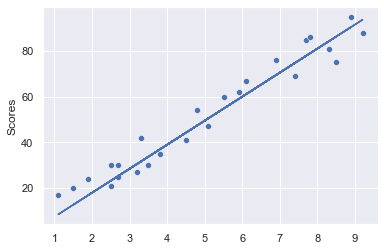

In [10]:
#Plotting the best fit line to the data
line = model.coef_*X+model.intercept_
sns.scatterplot(X.flatten(),y)
plt.plot(X.flatten(),line)

In [15]:
#Checking the accuracy of Linear Regression model
from sklearn import metrics
print("Training Score: {}".format(model.score(Xtrain,ytrain)))
print("Testing score: {}".format(ymodel))
r2_score=metrics.r2_score(ytest,ymodel)
print("r2_score:{}".format(r2_score))
model.accuracy

Training Score: 0.9530848362877066
Testing score: [ 8.4553864  25.29301306 12.66479306 31.60712305 54.75885971 23.18830972
 47.39239804 84.22470636]
r2_score:0.8863059783198541


In [12]:
#Comapring the actual and predicted values
final=pd.DataFrame({"Actual values":ytest.values,"Predicted values":ymodel})
final

,Actual values,Predicted
0,17,8.455386
1,30,25.293013
2,20,12.664793
3,42,31.607123
4,60,54.758860
5,30,23.188310
6,54,47.392398
7,81,84.224706


Text(0.5, 1.0, 'Actual vs Predicted')

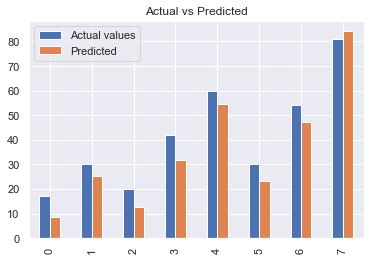

In [13]:
final.plot(kind='bar')
plt.title('Actual vs Predicted')

In [14]:
#What will be predicted score if a student studies for 9.25 hrs/ day?
hours=np.array([9.25])
model.predict(hours.reshape(-1,1))
#Student will score approx 94 if a student studies for 9.25 hrs/ day

array([94.22204718])